In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
# Three obersavtions or inferences from the data
# 1. Capomulin and Ramicane are the most promising treatment regimens as they resulted in the smallest final tumor volumes on average, compared to other treatments.
# 2. The final tumor volume was strongly correlated with the weight of the mouse, suggesting that larger mice tended to have larger tumors, regardless of the treatment.
# 3. The gender distribution of mice in the study was relatively balanced, with only a slightly higher proportion of male mice. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Dependencies and Setup
from pathlib import Path

# File to Load 
mouse_metadata_to_load = Path("/kaggle/input/matplotlib/Mouse_metadata.csv")
study_results_to_load = Path("/kaggle/input/matplotlib/Study_results.csv")

# Read and store into Pandas DataFrames
mouse_metadata = pd.read_csv(mouse_metadata_to_load)
study_results = pd.read_csv(study_results_to_load)

# Combine the data into a single dataset.  
mouse_data_complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
mouse_data_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [11]:
# Print the number of unique mice IDs
print("Number of unique mice IDs: ", mouse_data_complete['Mouse ID'].nunique())

Number of unique mice IDs:  249


In [12]:
# Identify mouse IDs with duplicate time points
duplicate_mouse_ids = mouse_data_complete[mouse_data_complete.duplicated(subset=['Mouse ID', 'Timepoint'])]['Mouse ID'].unique()

# If there are any duplicate mouse IDs, display the data associated with those IDs
if len(duplicate_mouse_ids) > 0:
    print("Mouse IDs with duplicate time points: ", duplicate_mouse_ids)
    duplicate_mouse_data = mouse_data_complete[mouse_data_complete['Mouse ID'].isin(duplicate_mouse_ids)]
    print("Data associated with duplicate mouse IDs:")
    print(duplicate_mouse_data)

    # Create a new DataFrame with the duplicated data removed
    clean_mouse_data = mouse_data_complete.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep=False)
else:
    print("No duplicate time points found in the data.")

Mouse IDs with duplicate time points:  ['g989']
Data associated with duplicate mouse IDs:
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21 

In [13]:
# Print the number of unique mice IDs in the clean data
print("Number of unique mice IDs clean: ", clean_mouse_data['Mouse ID'].nunique())

Number of unique mice IDs clean:  249


In [14]:
# Group the data by drug regimen
regimen_groups = clean_mouse_data.groupby(['Drug Regimen'])

# Calculate the statistics for each regimen
summary_stats = regimen_groups['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Print the summary statistics
print(summary_stats)


                   mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.458254  50.854632  44.053659  6.637293  0.540135
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398


In [15]:
# Count the number of rows for each drug regimen
regimen_counts = clean_mouse_data.groupby(['Drug Regimen']).count()['Mouse ID']

# Print the result
print(regimen_counts)

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     151
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64


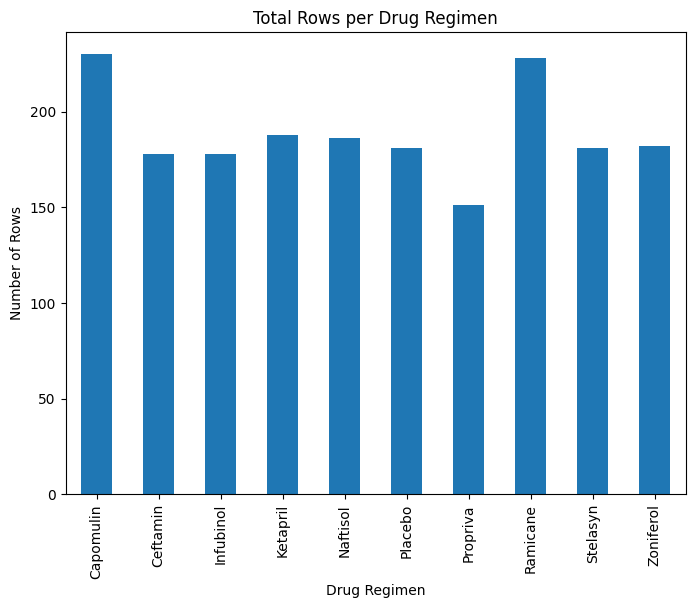

In [16]:
# Create a bar chart using the Pandas plot method
regimen_counts.plot(kind='bar', figsize=(8,6), title='Total Rows per Drug Regimen')
plt.ylabel('Number of Rows')
plt.show()

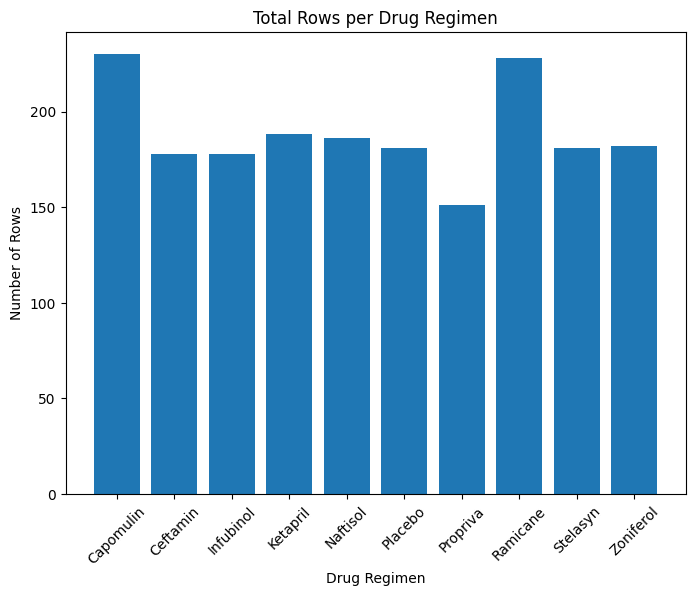

In [17]:
# Create a bar chart using Matplotlib's pyplot methods
plt.figure(figsize=(8,6))
plt.bar(regimen_counts.index, regimen_counts.values)
plt.title('Total Rows per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.xticks(rotation=45)
plt.show()


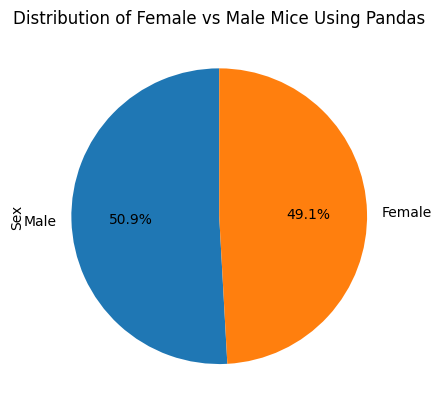

In [18]:
# Calculate the distribution of female versus male mice
gender_counts = clean_mouse_data['Sex'].value_counts()

# Create a pie chart with pandas
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)

# Add a title to the chart
plt.title('Distribution of Female vs Male Mice Using Pandas')

# Display the chart
plt.show()


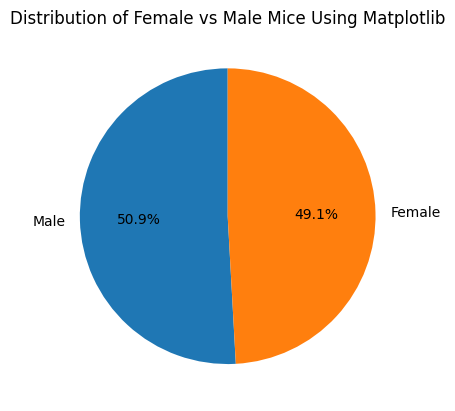

In [19]:
# Calculate the distribution of female versus male mice
gender_counts = clean_mouse_data['Sex'].value_counts()

# Create a pie chart with matplotlib
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)

# Add a title to the chart
plt.title('Distribution of Female vs Male Mice Using Matplotlib')

# Display the chart
plt.show()


In [20]:
# Step 1: Create a grouped DataFrame that shows the last (greatest) time point for each mouse
max_timepoint_df = clean_mouse_data.groupby(['Mouse ID'])['Timepoint'].max().reset_index()
max_timepoint_df = max_timepoint_df.rename(columns={'Timepoint': 'Max Timepoint'})

# Merge the max timepoint DataFrame with the original cleaned DataFrame
merged_data = pd.merge(clean_mouse_data, max_timepoint_df, on='Mouse ID')

# Step 2: Create a list that holds the treatment names as well as a second, empty list to hold the tumor volume data
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_volume_data = []

# Step 3: Loop through each drug in the treatment list, locating the rows in the merged DataFrame that correspond to each treatment. Append the resulting final tumor volumes for each drug to the empty list.
for drug in treatment_list:
    drug_data = merged_data.loc[merged_data['Drug Regimen'] == drug]
    final_tumor_volume = drug_data.loc[drug_data['Timepoint'] == drug_data['Max Timepoint']]['Tumor Volume (mm3)']
    tumor_volume_data.append(final_tumor_volume)

# Step 4: Determine outliers by using the upper and lower bounds, and then print the results.
for i, drug in enumerate(treatment_list):
    quartiles = tumor_volume_data[i].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outliers = tumor_volume_data[i][(tumor_volume_data[i] < lower_bound) | (tumor_volume_data[i] > upper_bound)]
    
    print(f"{drug} Potential Outliers: {outliers}")


Capomulin Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol Potential Outliers: 669    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


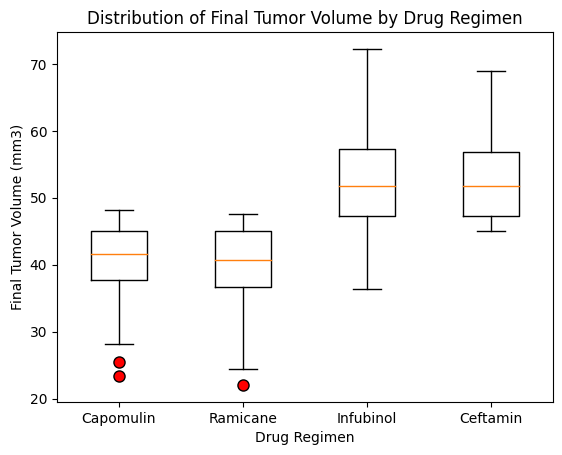

In [21]:
import matplotlib.pyplot as plt

# Create a list of the four treatment regimens
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create an empty list to hold the final tumor volumes for each drug
final_volumes = []

# Loop through each drug in the treatment list
for drug in treatments:
    # Locate the rows in the merged DataFrame that correspond to each drug
    drug_data = merged_data.loc[merged_data['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    # Append the resulting final tumor volumes for each drug to the empty list
    final_volumes.append(drug_data)

# Create a box plot of the final tumor volumes for each drug
fig, ax = plt.subplots()
ax.boxplot(final_volumes, labels=treatments, showfliers=True, flierprops=dict(marker='o', markerfacecolor='red', markersize=8))
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Final Tumor Volume (mm3)')
ax.set_title('Distribution of Final Tumor Volume by Drug Regimen')
plt.show()


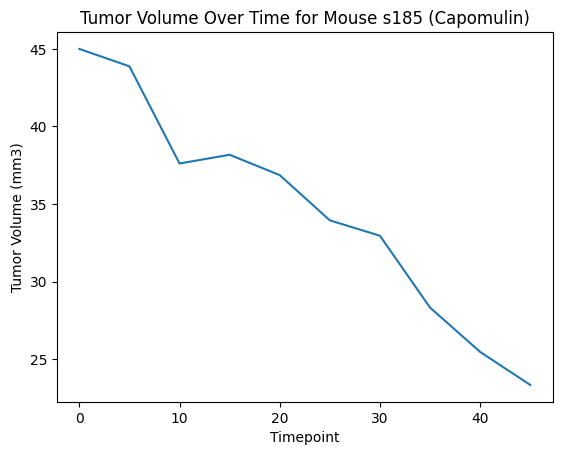

In [22]:
import matplotlib.pyplot as plt

# Step 1: Filter the clean_mouse_data DataFrame to only include rows where the Drug Regimen is Capomulin
capomulin_data = clean_mouse_data[clean_mouse_data['Drug Regimen'] == 'Capomulin']

# Step 2: Get a list of unique Mouse ID values that correspond to mice treated with Capomulin
capomulin_mice = capomulin_data['Mouse ID'].unique()

# Step 3: Select a single Mouse ID from the list of unique Mouse ID values
selected_mouse = capomulin_mice[0]

# Step 4: Filter the capomulin_data DataFrame to only include rows where the Mouse ID is the selected Mouse ID
selected_mouse_data = capomulin_data[capomulin_data['Mouse ID'] == selected_mouse]

# Step 5: Create a line plot of tumor volume versus time point for the selected mouse
plt.plot(selected_mouse_data['Timepoint'], selected_mouse_data['Tumor Volume (mm3)'])

# Add axis labels and a title
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Tumor Volume Over Time for Mouse {selected_mouse} (Capomulin)')

# Show the plot
plt.show()


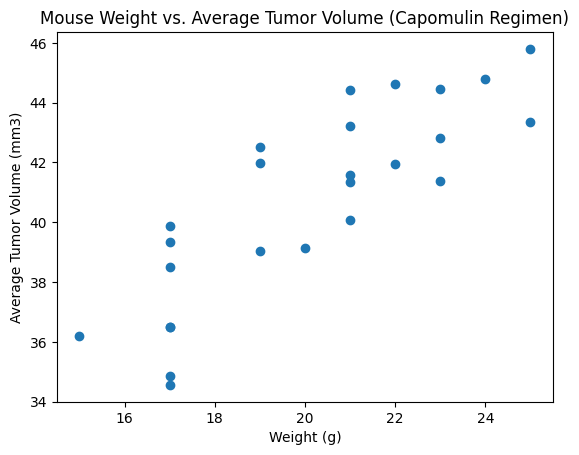

In [23]:
# Filter the data to only include the Capomulin treatment regimen
capomulin_data = clean_mouse_data[clean_mouse_data['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse in the Capomulin group
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge the average tumor volume data with the mouse metadata to get the weight for each mouse
capomulin_data_with_weight = pd.merge(avg_tumor_volume, mouse_metadata, on='Mouse ID')

# Create the scatter plot
plt.scatter(capomulin_data_with_weight['Weight (g)'], capomulin_data_with_weight['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.show()


Correlation coefficient: 0.8419363424694721
Linear regression equation: y = 0.9544396890241049x + 21.552160532685008


/tmp/ipykernel_34/3749166783.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  capomulin_avg = capomulin_data.groupby(["Mouse ID"]).mean()


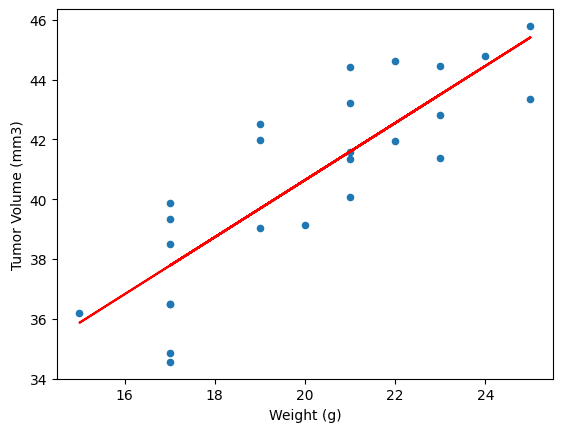

In [26]:
# Import dependencies
from scipy.stats import linregress

# Filter the Capomulin data
capomulin_data = mouse_data_complete[mouse_data_complete["Drug Regimen"] == "Capomulin"]

# Calculate the average tumor volume for each mouse on Capomulin
capomulin_avg = capomulin_data.groupby(["Mouse ID"]).mean()

# Generate a scatter plot of mouse weight versus average tumor volume
ax = capomulin_avg.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)")

# Calculate the correlation coefficient and linear regression model
slope, intercept, rvalue, pvalue, stderr = linregress(capomulin_avg["Weight (g)"], capomulin_avg["Tumor Volume (mm3)"])
print(f"Correlation coefficient: {rvalue}")
print(f"Linear regression equation: y = {slope}x + {intercept}")

# Add the linear regression line to the scatter plot
x = capomulin_avg["Weight (g)"]
ax.plot(x, slope*x + intercept, color="red")
